In [2]:
# Install autograd package
!pip install autograd

You should consider upgrading via the 'pip install --upgrade pip' command.


In [4]:
# Lets define a helper functions for pretty printing and plotting

import matplotlib.pyplot as plt

def fmt(n):
    '''
    Limit n to 12 decimal points for logging
    '''
    return str.format('{0:.12f}', n)

def my_plot(data, xlabel, ylabel):
    '''
    Plot evolution of absolute error over iterations
    '''
    fig=plt.figure(figsize=(4, 3), dpi= 80, facecolor='w', edgecolor='k')
    plt.plot(data, 'b')
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    plt.show()

Iter 0:   x = 3.000000000000 y = 4.000000000000 dx = 20.000000000000 dy = 80.000000000000  a = 22.000000000000
Iter 1:   x = 2.800000000000 y = 3.200000000000 dx = 7.680000000000 dy = 24.576000000000  a = 15.840000000000
Iter 2:   x = 2.723200000000 y = 2.954240000000 dx = 4.347867955200 dy = 12.844645427970  a = 14.173933977600
Iter 3:   x = 2.679721320448 y = 2.825793545720 dx = 2.689103607861 dy = 7.598851618867  a = 13.344551803931
Iter 4:   x = 2.652830284369 y = 2.749805029532 dx = 1.734176538352 dy = 4.768647367257  a = 12.867088269176
Iter 5:   x = 2.635488518986 y = 2.702118555859 dx = 1.144843455779 dy = 3.093502745415  a = 12.572421727890
Iter 6:   x = 2.624040084428 y = 2.671183528405 dx = 0.766603222556 dy = 2.047737900913  a = 12.383301611278
Iter 7:   x = 2.616374052203 y = 2.650706149396 dx = 0.517982389699 dy = 1.373019105655  a = 12.258991194850
Iter 8:   x = 2.611194228306 y = 2.636975958339 dx = 0.352061322940 dy = 0.928377244455  a = 12.176030661470
Iter 9:   x = 2

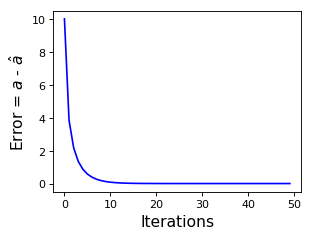

In [20]:
import autograd.numpy as np
from autograd import grad

# Autograd has many derivative functions such as grad, elementwise_grad, jacobian, hessian etc. 
# We will only use grad in this notebook for illustrations 

def layer(x, y):
    a = 2*x + y**2
    return a

# Provided for reference, Not used
def bwd_layer(d_da, x, y):
    '''
    A hand-written backward implementation for reference
    Note that if da is not passed in, one would need to multiply the returned 
    values by da
    Inout values are passed in because this method is not inside a class, hence cannot use memoization to store inputs
    '''
    d_dx = 2 * d_da    
    d_dy = 2 * y * d_da
    return d_dx, d_dy

# Initialise with randomly chosen parameters
# This is chosen to be near-ish the right answer for faster convergence.
# it can be truly random, but one has to be a lot more careful and patient with 
# the training process (aka learning rate) in order to learn from truly random initialization
# True random initialization (within some known distribution) is standard practice in neural network training
# We won't distinguish between inputs and params here, as these examples are extremely simple
# That is, we are assuming inputs are constants, all equal to 1 and we only talk about the params
# In practice, inputs are sampled from training data and 
# params are randomly initialized and updated during the training process
# Inputs are never updated or modified, only ever sampled from training set, read and used
x = 3.0 
y = 4.0
a_hat = np.float64(12.0) # to match with the return type of grad values
lr = 0.01 # learning rate
grad_layer = grad(layer,(0,1)) # grad of the function layer and we want to differentiate wrt args 0,1, i.e. x and y 

errors=[]
for i in range(50):
    # Do a forward pass i.e. Evaluate function at current params
    a = layer(x,y)    
    # Compute optimization metric, here error
    da = a - a_hat
    
    # Do a backward pass (backprop) i.e. compute gradients
    # autograd.grad assumes change in output = da = 1.0, i.e. returns dx/da and dy/da
    # so we multiply the returned values by da to get dx, dy
    grads = grad_layer(x,y)  
    dx, dy = (g*da for g in grads)       
    
    # Uncomment this to check the gradients against reference bwd_layer implementation
    # dx_bwd, dy_bwd = bwd_layer(da, x, y) 
    
    print("Iter {}:   x = {} y = {} dx = {} dy = {}  a = {}".format(i, fmt(x), fmt(y), fmt(dx), fmt(dy), fmt(a)))

    # Update params using a fraction of the computed update 
    # As this is an iterative process and involves an element of randmization, 
    # we take small steps at a time to make sure we don't end up stuck
    x = x - lr*dx
    y = y - lr*dy
    
    errors.append(abs(da))

my_plot(errors, 'Iterations', 'Error = $a$ - $\hat{a}$')

Iter 0:   x = 3.000000000000 y = 4.000000000000 dx = -40.000000000000 dy = -12.000000000000  z = 21.000000000000
Iter 1:   x = 3.400000000000 y = 4.120000000000 dx = 6.202560000000 dy = 1.931200000000  z = 25.568000000000
Iter 2:   x = 3.337974400000 y = 4.100688000000 dx = -1.831331423119 dy = -0.567239809760  z = 24.830064661443
Iter 3:   x = 3.356287714231 y = 4.106360398098 dx = 0.506263176811 dy = 0.157054714783  z = 25.046794175040
Iter 4:   x = 3.351225082463 y = 4.104789850950 dx = -0.142825673385 dy = -0.044288919129  z = 24.986784260072
Iter 5:   x = 3.352653339197 y = 4.105232740141 dx = 0.040071072339 dy = 0.012427170309  z = 25.003706667243
Iter 6:   x = 3.352252628474 y = 4.105108468438 dx = -0.011259957390 dy = -0.003491912173  z = 24.998958338598
Iter 7:   x = 3.352365228047 y = 4.105143387560 dx = 0.003162653714 dy = 0.000980804262  z = 25.000292570825
Iter 8:   x = 3.352333601510 y = 4.105133579517 dx = -0.000888423818 dy = -0.000275517845  z = 24.999917813118
Iter 9:

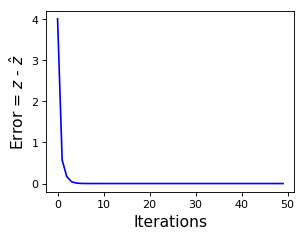

In [21]:
def add(x, y): 
    return x+y

def net(x, y):
    return x * add(x,y)


x = 3.0
y = 4.0
z_hat = np.float64(25.0)
lr = 0.01
grad_net = grad(net,(0,1)) # grad of function net and we want to differentiate wrt args 0,1, i.e. x and y 
                           # Note that we only need to use the grad call for the final function in a chain of operations
                           # we then get all derivatives wrt specified inputs to this function

errors=[]
for i in range(50):
    z = net(x,y)    
    
    dz = z - z_hat
    
    grads = grad_net(x,y)  # assumes da = 1.0, i.e. returns dx/da and dy/da
    dx, dy = (g*dz for g in grads)     # so multiply the returned values by da to get dx, dy  
    
    print("Iter {}:   x = {} y = {} dx = {} dy = {}  z = {}".format(i, fmt(x), fmt(y), fmt(dx), fmt(dy), fmt(z)))

    x = x - lr*dx
    y = y - lr*dy
    
    errors.append(abs(dz))

my_plot(errors, 'Iterations', 'Error = $z$ - $\hat{z}$')